In [1]:
# 卷积的操作

import pylab
import numpy as np
from scipy import signal
# 设置原图像
img = np.array([[10, 10, 10, 10, 10],
                     [10, 5, 5, 5, 10],
                     [10, 5, 5, 5, 10],
                     [10, 5, 5, 5, 10],
                     [10, 10, 10, 10, 10]])
# 设置卷积核
fil = np.array([[ -1,-1, 0],
                [ -1, 0, 1],
                [  0, 1, 1]])
# 对原图像进行卷积操作
res = signal.convolve2d(img, fil, mode='valid')
# 输出卷积后的结果
print(res)

[[ 15  10   0]
 [ 10   0 -10]
 [  0 -10 -15]]


## 卷积的作用

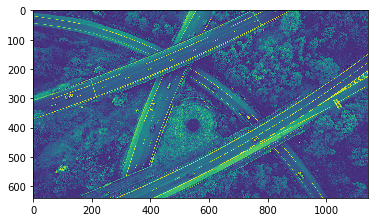

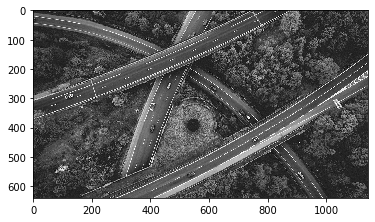

[[-14 -25   6 ... -20 -10  -3]
 [-25   4  36 ...   0  28   7]
 [  2  33  22 ...  62   4 -70]
 ...
 [ -7   6  17 ...  -5   1  -1]
 [  8  26  11 ... 113 118 127]
 [ -3  10 -17 ...  89  62  72]]


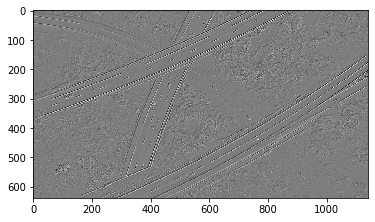

In [2]:
# 图片的操作

import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np
from scipy import signal
# 读取灰度图像
img = cv2.imread("./data/image/aaa.jpg", 0)
plt.imshow(img,)
plt.show()
# 显示灰度图像
plt.imshow(img,cmap="gray")
pylab.show()
# 设置卷积核
fil = np.array([[ -1,-1, 0],
                [ -1, 0, 1],
                [  0, 1, 1]])
# 卷积操作
res = signal.convolve2d(img, fil, mode='valid')
print(res)
#显示卷积后的图片
plt.imshow(res,cmap="gray")
pylab.show()

## 手写数字识别

In [3]:
# 使用LeNet模型对Mnist手写数字进行识别
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

Using TensorFlow backend.


### 加载数据

In [4]:
mnist = np.load("./data/mnist.npz")
mnist

In [5]:
x_train, y_train = mnist['x_train'],mnist['y_train']
x_test, y_test = mnist['x_test'],mnist['y_test']
x_train.shape

(60000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_train[1,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train.reshape(x_train.shape[0],28,28,1).shape

(60000, 28, 28, 1)

In [9]:
train_x = x_train.reshape(x_train.shape[0], 28, 28, 1)
test_x = x_test.reshape(x_test.shape[0], 28, 28, 1)
train_x = train_x / 255
test_x = test_x / 255
train_y = keras.utils.to_categorical(y_train, 10)
test_y = keras.utils.to_categorical(y_test, 10)

In [10]:
train_x.shape

(60000, 28, 28, 1)

In [11]:
train_y.shape

(60000, 10)

In [12]:
# 创建序贯模型
model = Sequential()
# 第一层卷积层：6个卷积核，大小为5∗5, relu激活函数
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第三层卷积层：16个卷积核，大小为5*5，relu激活函数
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 将参数进行扁平化，在LeNet5中称之为卷积层，实际上这一层是一维向量，和全连接层一样
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# 全连接层，输出节点个数为84个
model.add(Dense(84, activation='relu'))
# 输出层 用softmax 激活函数计算分类概率
model.add(Dense(10, activation='softmax'))


In [ ]:
# 设置损失函数和优化器配置
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# 传入训练数据进行训练
model.fit(train_x, train_y, batch_size=128, epochs=2, verbose=1, validation_data=(test_x, test_y))
# 对结果进行评估
score = model.evaluate(test_x, test_y)
print('误差:%0.4lf' %score[0])
print('准确率:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
